<h3>Import Libraries</h3>

In [14]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, Input

<h3>Step 1: Load and Preprocess the Data</h3>

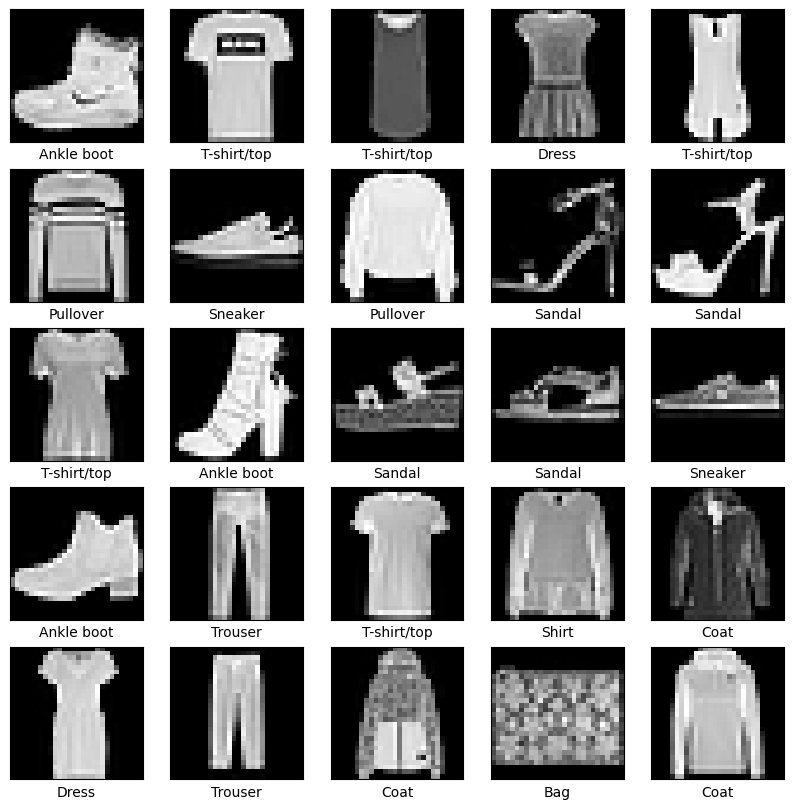

In [16]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalize the data to scale pixel values between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Display some images and their labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(class_names[y_train[i]])
plt.show()

Normalize the data to ensure faster convergence during training by scaling pixel values between 0 and 1.
Displaying some sample images with labels helps verify that the data is loaded correctly and allows us to observe different fashion item classes.

<h3>Step 2: Model Building</h3>

In [18]:
# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),           # Flattening the 2D images to 1D vector
    Dense(128, activation='relu'),           # First hidden layer with ReLU activation
    Dropout(0.2),                            # Dropout layer to prevent overfitting
    Dense(64, activation='relu'),            # Second hidden layer with ReLU activation
    Dropout(0.2),                            # Additional dropout layer
    Dense(10, activation='softmax')          # Output layer with softmax for multiclass classification
])

 - Flatten Layer: Converts each 28x28 image into a 784-dimensional vector to feed into the fully connected (Dense) layers.
 - Hidden Layers: We use two hidden layers with 128 and 64 neurons, respectively, and relu activation functions. The relu function introduces non-linearity, helping the model capture complex patterns.
 - Dropout Layers: Dropout (with a rate of 0.2) is applied to reduce overfitting by randomly disabling 20% of neurons during each training batch.
 - Output Layer: A softmax layer with 10 neurons represents the 10 fashion item classes. Softmax ensures each output is a probability, with the highest value corresponding to the predicted class.

<h3>Step 3: Model Compilation and Training</h3>

In [20]:
# Compile the model
model.compile(optimizer='adam',              # Optimizer
              loss='sparse_categorical_crossentropy',  # Loss function
              metrics=['accuracy'])          # Evaluation metric

# Train the model
history = model.fit(X_train, y_train, 
                    epochs=20, 
                    validation_data=(X_test, y_test))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7216 - loss: 0.7819 - val_accuracy: 0.8422 - val_loss: 0.4377
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8431 - loss: 0.4345 - val_accuracy: 0.8516 - val_loss: 0.4039
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8538 - loss: 0.3986 - val_accuracy: 0.8587 - val_loss: 0.3798
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8650 - loss: 0.3758 - val_accuracy: 0.8692 - val_loss: 0.3654
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8717 - loss: 0.3524 - val_accuracy: 0.8672 - val_loss: 0.3698
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8739 - loss: 0.3397 - val_accuracy: 0.8681 - val_loss: 0.3578
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8781 - loss: 0.3280 - val_accuracy: 0.8750 - val_loss: 0.3431
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8841 - loss: 0.3182 - 

 - Optimizer (Adam): Adam is an adaptive optimizer that generally works well for most problems, balancing speed and accuracy.
 - Loss Function: sparse_categorical_crossentropy is used because the labels are integers rather than one-hot encoded vectors.
 - Metrics: We track accuracy for evaluating classification performance.
 - Epochs: We use 20 epochs to allow enough training for convergence, though this may be adjusted based on overfitting observations.

<h5>Training Accuracy and Loss:</h5>

The training accuracy improves steadily over epochs, reaching approximately 90% by the end of the training. This indicates that the model is learning the patterns in the training data well.
The training loss decreases consistently, which is expected as the model minimizes errors on the training set.

<h5>Validation Accuracy and Loss:</h5>

The validation accuracy initially improves, reaching a stable range around 87-88% after a few epochs. It continues to fluctuate slightly but remains relatively consistent across the latter epochs.
The validation loss shows a similar trend, decreasing initially but then fluctuating and plateauing. This stability in validation loss and accuracy suggests that the model has reached its best possible performance with the current architecture and hyperparameters.

<h5>Overfitting Observations:</h5>

There is a slight gap between training and validation accuracy, with training accuracy slightly higher (around 90%) than validation accuracy (around 87-88%). This suggests mild overfitting, as the model performs better on the training data than on unseen data.
However, the overfitting isn’t severe, as the validation accuracy doesn’t drop significantly.

<h5>Potential Improvements:</h5>

Early Stopping: Introducing early stopping could help avoid unnecessary training epochs. It would stop training when validation loss stops improving, potentially reducing the risk of overfitting.
Regularization: Adding more dropout layers or increasing dropout rates slightly could also reduce overfitting.
Hyperparameter Tuning: Experimenting with different model architectures, optimizers, or batch sizes may further improve validation performance.

<h3>Step 4: Evaluate and Plot Training/Validation Metrics</h3>

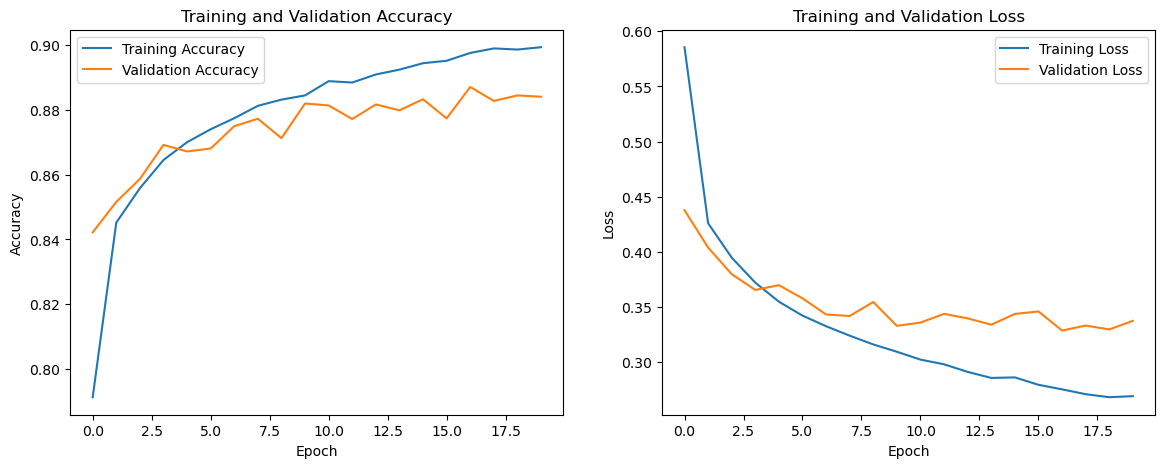

In [22]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


This code plots the accuracy and loss for both training and validation sets over the epochs.

Observing these plots helps detect overfitting if the validation loss increases while training loss decreases, or if there’s a large gap between training and validation metrics.

<h5>Training and Validation Accuracy:</h5>

The training accuracy increases steadily and reaches approximately 90% by the end of the training epochs, indicating that the model is learning well on the training data.
The validation accuracy also improves initially but plateaus around 88-89%. This is slightly lower than the training accuracy, which suggests some potential overfitting, though it's not severe.

<h5>Training and Validation Loss:</h5>

The training loss decreases consistently, reflecting that the model is learning and minimizing errors on the training set effectively.
The validation loss also decreases initially but starts fluctuating after around epoch 5-10. This behavior suggests that the model might start overfitting after this point, as it continues to optimize for the training set but doesn’t generalize as well to the validation set.

<h5>Number of Hidden Layers</h5>

Choice: I used 2 hidden layers in the model.
Reasoning: Two hidden layers are sufficient for a moderately complex task like classifying Fashion MNIST items, as each item type can be represented by specific patterns in the data. More layers could capture even more complexity but would also increase the risk of overfitting and slow down training. We aimed to balance learning capacity with computational efficiency.

<h5>Number of Neurons per Layer</h5>

Choice: 128 neurons in the first hidden layer and 64 neurons in the second hidden layer.
Reasoning: We used a larger number of neurons in the first layer to capture a broad range of features from the images. The second layer, with fewer neurons, helps refine these features and focus on specific patterns. This gradual reduction in neurons allows the model to generalize better and avoid unnecessary complexity.

<h5>Activation Functions</h5>

Choice: ReLU (Rectified Linear Unit) for the hidden layers and softmax for the output layer.
Reasoning: The ReLU activation function is widely used in hidden layers because it helps mitigate the vanishing gradient problem, allowing the model to learn more effectively. ReLU is also computationally efficient. The softmax activation function is used in the output layer because it provides a probability distribution across the 10 output classes, which is ideal for multi-class classification.

<h5>Dropout Rate</h5>

Choice: Dropout rate of 0.2 after each hidden layer.
Reasoning: Dropout helps prevent overfitting by randomly disabling 20% of neurons during training, which forces the model to learn more robust features. A dropout rate of 0.2 is a common starting point, balancing regularization without significantly slowing down learning.

<h5>Optimizer</h5>

Choice: Adam (Adaptive Moment Estimation).
Reasoning: Adam is an adaptive learning rate optimizer that combines the advantages of two other popular optimizers, AdaGrad and RMSprop. It adjusts the learning rate throughout training, making it well-suited for noisy data or sparse gradients, which is common in image data like Fashion MNIST.

<h5>Loss Function</h5>

Choice: Sparse Categorical Crossentropy.
Reasoning: Since the Fashion MNIST labels are integers (not one-hot encoded), sparse categorical crossentropy is appropriate, as it directly handles integer labels and calculates the loss for each class. This loss function is ideal for multi-class classification tasks.

<h5>Batch Size</h5>

Choice: TensorFlow’s default batch size.
Reasoning: The default batch size is typically 32, which balances memory usage and training speed. Larger batches might result in slightly smoother convergence but would require more memory. For this initial run, we kept the default but could tune it if necessary.

<h5>Epochs</h5>

Choice: 20 epochs.
Reasoning: Training for 20 epochs allowed the model to converge to a reasonably good solution without overfitting significantly. Based on the performance plots, we can see that performance stabilizes by around 15 epochs, so we could also consider reducing the number of epochs or adding early stopping.